In [81]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Loading Data

### Load Q4 2013 Raw Data Sheet

In [2]:
df = pd.read_excel(r'Groupon_North_America_Data_Q4_2013_XLSX.xlsx')
df

,Deal ID,Units Sold,Gross Billings,Start Date,Deal URL,Segment
0,gr-millevois-tire-service-center,0.000,0.00000,2011-11-21,http://www.groupon.com/deals/gr-millevois-tire...,Local
1,gr-manakeesh-cafe-bakery,0.000,0.00000,2011-11-21,http://www.groupon.com/deals/gr-manakeesh-cafe...,Local
2,gr-phoenix-salon-and-spa,0.000,0.00000,2011-11-21,http://www.groupon.com/deals/gr-phoenix-salon-...,Local
3,gr-hands-in-motion,0.000,0.00000,2011-11-21,http://www.groupon.com/deals/gr-hands-in-motion,Local
4,dc-fd2-bartending-college-allentown-reading,86.800,4253.20000,2012-06-06,http://www.groupon.com/deals/dc-fd2-bartending...,Local
...,...,...,...,...,...,...
138529,gg-zuzuzen-performance-leggings-1,433.136,10824.06864,2013-12-11,http://www.groupon.com/deals/gg-zuzuzen-perfor...,Goods
138530,gg-zuzuzen-performance-tight-fit-two-tone-yoga...,239.752,5511.89848,2013-12-24,http://www.groupon.com/deals/gg-zuzuzen-perfor...,Goods
138531,gg-zuzuzen-tight-fit-yoga-pant-tank,290.536,5131.06264,2013-12-21,http://www.groupon.com/deals/gg-zuzuzen-tight-...,Goods
138532,dr-z-med-spa-philadelphia,1.450,1303.55000,2013-12-10,http://www.groupon.com/deals/dr-z-med-spa-phil...,Local


In [3]:
df0 = df.copy()  # create a copy of the original data for comparison.

### Load Historical Data Sheet

In [4]:
df2 = pd.read_excel(r'Groupon_North_America_Data_Q4_2013_XLSX.xlsx', sheet_name=1)

df2

,YipitData Historical Estimates,Q3 2012,Unnamed: 2,Unnamed: 3,Q4 2012,Unnamed: 5,Unnamed: 6,Q1 2013,Unnamed: 8,Unnamed: 9,Q2 2013,Unnamed: 11,Unnamed: 12,Q3 2013,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2012-07-01 00:00:00,2012-08-01 00:00:00,2012-09-01 00:00:00,2012-10-01 00:00:00,2012-11-01 00:00:00,2012-12-01 00:00:00,2013-01-01 00:00:00,2013-02-01 00:00:00,2013-03-01 00:00:00,2013-04-01 00:00:00,2013-05-01 00:00:00,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00
2,Gross Billings ($ million),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Local,133.414773,137.321693,138.2,126.8,139.9,164.4,162.7,143,163.4,143.8,162.2,153.2,139.951254,136.66794,133.79504
4,Goods,26.733909,33.008915,50.8,64.3,85.1,64.3,47.3,46,51,62.8,71.7,67.1,61.279984,67.024982,63.194983
5,Travel,16.770766,15.436645,14.3,16.6,14.6,18.5,22.6,13.6,20.3,18.9,22.9,22.8,22.404492,22.738887,21.735701
6,Total,176.919448,185.767253,203.3,207.7,239.6,247.2,232.6,202.6,234.7,225.5,256.8,243.1,223.635729,226.431809,218.725724
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Q3 2012,NaN,NaN,Q4 2012,NaN,NaN,Q1 2013,NaN,NaN,Q2 2013,NaN,NaN,Q3 2013,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cleaning and reindexing the historical data sheet and fit it into a dataframe.

In [5]:
dfH = {}

dfH['grossbillings'] = df2[1:7].drop(index=2)
dfH['units_sold'] = df2[12:16]
dfH['deals_started'] = df2[21:]

In [6]:
dfH['grossbillings'].columns = dfH['grossbillings'].loc[1, :]
dfH['grossbillings'].drop(index=1, inplace=True)
dfH['units_sold'].columns = dfH['grossbillings'].columns
dfH['deals_started'].columns = dfH['grossbillings'].columns

In [7]:
# transpose row to column
for key in dfH.keys():
    print(key)
    dfH[key] = dfH[key].transpose()
    dfH[key].columns = dfH[key].loc[pd.NaT, :]
    dfH[key].drop(index=pd.NaT, inplace=True)

grossbillings
units_sold
deals_started


In [8]:
# convert gross billings to dollar amount
dfH['grossbillings'] = 1.0e6 * dfH['grossbillings']

dfH['grossbillings']

NaT,Local,Goods,Travel,Total
1,,,,
2012-07-01,133414773.040001,26733909.13,16770765.93,176919448.100001
2012-08-01,137321693.41,33008914.69,15436645.08,185767253.18
2012-09-01,138200000.0,50800000.0,14300000.0,203300000.0
2012-10-01,126800000.0,64300000.0,16600000.0,207700000.0
2012-11-01,139900000.0,85100000.0,14600000.0,239600000.0
2012-12-01,164400000.0,64300000.0,18500000.0,247200000.0
2013-01-01,162700000.0,47300000.0,22600000.0,232600000.0
2013-02-01,143000000.0,46000000.0,13600000.0,202600000.0
2013-03-01,163400000.0,51000000.0,20300000.0,234700000.0


In [9]:
dfH['units_sold']

NaT,Local,Goods,Travel,Total
1,,,,
2012-07-01,4400800.1,855156.18,61283.36,5317239.64
2012-08-01,4233714.74,1162884.17,84984.55,5481583.46
2012-09-01,4991814.59,1629823.06,60253.49,6681891.14
2012-10-01,5177435.73,1879696.7,74358.37,7131490.8
2012-11-01,4920379.38,2583171.53,87332.57,7590883.48
2012-12-01,5502182.25,1915783.55,93702.6,7511668.4
2013-01-01,5330316.29726,1596737.74,84821.49,7011875.52726
2013-02-01,4823771.583533,1491286.16,55029.81,6370087.553533
2013-03-01,5530983.027387,1685055.23,84685.82,7300724.077387


In [10]:
dfH['deals_started']

NaT,Local,Goods,Travel,Total
1,,,,
2012-07-01,13543,334,211,14088
2012-08-01,12926,448,277,13651
2012-09-01,12814,525,217,13556
2012-10-01,14544,770,262,15576
2012-11-01,13914,1079,270,15263
2012-12-01,15374,1310,334,17018
2013-01-01,12375,992,243,13610
2013-02-01,11846,1197,188,13231
2013-03-01,13041,1499,205,14745


In [11]:
# Checking the sum of deals started based on Historical Data sheet -- maybe useful to predict confidence later on.
dfH['deals_started'].loc['2012-07-01':'2012-09-01'].sum()

NaT
Local     39283
Goods      1307
Travel      705
Total     41295
dtype: object

In [12]:
dfH['units_sold'].loc['2012-07-01':'2012-09-01'].sum()

NaT
Local     13626329.430001
Goods          3647863.41
Travel           206521.4
Total     17480714.240001
dtype: object

In [13]:
dfH['grossbillings'].loc['2012-07-01':'2012-09-01'].sum()

NaT
Local     408936466.450001
Goods         110542823.82
Travel         46507411.01
Total     565986701.280001
dtype: object

### Load Groupon Historical Data Sheet

In [14]:
df3 = pd.read_excel(r'Groupon_North_America_Data_Q4_2013_XLSX.xlsx', sheet_name=2)

df3

,Groupon Historical Reported Metrics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Q3 2012,Q4 2012,Q1 2013,Q2 2013,Q3 2013
2,Gross Billings ($ million),NaN,NaN,NaN,NaN,NaN
3,Local,355.743,430.255,450.14,450.463,402.796
4,Goods,152.116,240.845,165.359,196.878,194.565
5,Travel,44.51,47.852,65.82,64.864,67.638
6,Total,552.369,718.952,681.319,712.2,664.999
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Q3 2012,Q4 2012,Q1 2013,Q2 2013,Q3 2013


#### Cleaning and reindexing the Groupon historical data sheet and fit it into a dataframe.

In [15]:
dfsG = {}
dfsG['grossbillings'] = df3.loc[1:6, :'Unnamed: 5'].transpose()
dfsG['grossprofit'] = df3.loc[11:14, 'Unnamed: 1':'Unnamed: 5'].transpose()

In [16]:
dfsG['grossbillings'].set_index(1, inplace=True)
dfsG['grossbillings'].columns = dfsG['grossbillings'].iloc[0]
dfsG['grossbillings'].drop('Gross Billings ($ million)',axis=1, inplace=True)
dfsG['grossbillings'] = dfsG['grossbillings'].loc['Q3 2012':]
dfsG['grossbillings'] = 1.0e6 * dfsG['grossbillings']

In [17]:
dfsG['grossprofit'].set_index(dfsG['grossbillings'].index, inplace=True)
dfsG['grossprofit'].columns = dfsG['grossbillings'].columns
dfsG['grossprofit'] = 1.0e6 * dfsG['grossprofit']

In [18]:
dfsG['grossbillings']

nan,Local,Goods,Travel,Total
1,,,,
Q3 2012,355743000.0,152116000.0,44510000.0,552369000.0
Q4 2012,430255000.0,240845000.0,47852000.0,718952000.0
Q1 2013,450140000.0,165359000.0,65820000.0,681319000.0
Q2 2013,450463000.0,196878000.0,64864000.0,712200000.0
Q3 2013,402796000.0,194565000.0,67638000.0,664999000.0


In [19]:
dfsG['grossprofit']

nan,Local,Goods,Travel,Total
1,,,,
Q3 2012,123036000.0,28068000.0,9464000.0,160568000.0
Q4 2012,119251000.0,22728000.0,9581000.0,151560000.0
Q1 2013,145678000.0,12456000.0,14222000.0,172356000.0
Q2 2013,154356000.0,26977000.0,13253000.0,194586000.0
Q3 2013,138357000.0,21609000.0,11603000.0,171569000.0


### Load Consensus Sheet

In [20]:
df4 = pd.read_excel(r'Groupon_North_America_Data_Q4_2013_XLSX.xlsx', sheet_name=3)

df4

,Sell-Side Consensus 4Q13 Estimates,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,Consensus ($ million),Gross Billings,Gross Profit
3,NaN,NaN,NaN
4,JP Morgan,NaN,NaN
5,Local,490.142,146.651
6,Goods,275.716,31.669
7,Travel,71.02,13.494
8,Total,836.88,191.81
9,NaN,NaN,NaN


#### Cleaning and reindexing the Consensus sheet and fit it into a dataframe.

In [21]:
dfsB = {}
dfsB['jpm'] = df4.loc[5:8, :'Unnamed: 2']
dfsB['jpm'].columns = ['Segment', 'Gross Billings', 'Gross Profit']
dfsB['jpm']['bank'] = len(dfsB['jpm']) * ['jpm']

dfsB['ms'] = df4.loc[11:14, :'Unnamed: 2']
dfsB['ms']['bank'] = len(dfsB['ms']) * ['ms']
dfsB['ms'].columns = dfsB['jpm'].columns

dfsB['db'] = df4.loc[17:17, :'Unnamed: 2']
dfsB['db']['bank'] = len(dfsB['db']) * ['db']
dfsB['db'].columns = dfsB['jpm'].columns

In [22]:
for b in ['jpm', 'ms', 'db']:
    dfsB[b][['Gross Billings', 'Gross Profit']] = 1.0e6 * dfsB[b][['Gross Billings', 'Gross Profit']]

In [23]:
# concatenate all in a single dataframe
dfB = pd.concat(dfsB.values())

dfB

,Segment,Gross Billings,Gross Profit,bank
5,Local,490142000.0,146651000.0,jpm
6,Goods,275716000.0,31669000.0,jpm
7,Travel,71020000.0,13494000.0,jpm
8,Total,836880000.0,191810000.0,jpm
11,Local,508000000.0,159000000.0,ms
12,Goods,295000000.0,27000000.0,ms
13,Travel,67000000.0,14000000.0,ms
14,Total,870000000.0,200000000.0,ms
17,Total,803200000.0,203600000.0,db


# Data Quality Assurance

### Data Cleaning

#### Check for basic data irregularities such as NULL values, duplicate entry, missing data, and 0 values while ignoring the known missing data from Oct 20-Oct 30 from Local Segment

In [24]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138534 entries, 0 to 138533
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Deal ID         138534 non-null  object        
 1   Units Sold      138534 non-null  float64       
 2   Gross Billings  138534 non-null  float64       
 3   Start Date      138534 non-null  datetime64[ns]
 4   Deal URL        138534 non-null  object        
 5   Segment         138534 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 6.3+ MB


There are no null values shown above by obtaining the dataframe info. However, I will do an extra check.

In [25]:
df.isnull().sum()

Deal ID           0
Units Sold        0
Gross Billings    0
Start Date        0
Deal URL          0
Segment           0
dtype: int64

Check for data with values == 0. 

In [26]:
df.loc[((df['Units Sold']) == 0) & ((df['Gross Billings']) != 0)]

,Deal ID,Units Sold,Gross Billings,Start Date,Deal URL,Segment


In [27]:
df.loc[((df['Units Sold']) > 0) & ((df['Gross Billings']) <= 0)]

,Deal ID,Units Sold,Gross Billings,Start Date,Deal URL,Segment


In [28]:
df.loc[((df['Units Sold']) < 0) & ((df['Gross Billings']) >= 0)]

,Deal ID,Units Sold,Gross Billings,Start Date,Deal URL,Segment


Check if there is data with duplicated entry.

In [29]:
df.duplicated().sum() 

#There is no duplicated data in the dataframe

0

#### Identify data containing rounding errors

In [30]:
# Check for rounding errors in both units sold and gross billings columns
df.loc[(abs(df['Gross Billings']) < 1e-10) & (abs(df['Units Sold']) < 1e-10) & (df['Gross Billings']!=0) & (df['Units Sold']!=0)]

,Deal ID,Units Sold,Gross Billings,Start Date,Deal URL,Segment
107,gorgeous-skin-spa,2.842171e-14,1.932676e-12,2012-09-16,http://www.groupon.com/deals/gorgeous-skin-spa,Local
299,burlingame-aquatic-club-2,1.421085e-14,6.821210e-13,2012-09-27,http://www.groupon.com/deals/burlingame-aquati...,Local
307,vo2-max-boot-camp,2.842171e-14,1.818989e-12,2012-09-28,http://www.groupon.com/deals/vo2-max-boot-camp,Local
437,j-herndon-photography-1,5.684342e-14,4.206413e-12,2012-10-02,http://www.groupon.com/deals/j-herndon-photogr...,Local
527,kugo-steakhouse-sushi-bar,-2.842171e-14,-5.400125e-13,2012-10-05,http://www.groupon.com/deals/kugo-steakhouse-s...,Local
...,...,...,...,...,...,...
91940,dream-body-8,3.552714e-15,2.415845e-13,2013-04-05,http://www.groupon.com/deals/dream-body-8,Local
100338,motion-picture-hairstyling,6.217249e-15,3.836931e-13,2013-08-03,http://www.groupon.com/deals/motion-picture-ha...,Local
101661,overground-tattoo-2,-3.108624e-15,-2.273737e-13,2013-04-12,http://www.groupon.com/deals/overground-tattoo-2,Local
102994,queen-hair-salon,4.440892e-15,2.842171e-13,2013-02-07,http://www.groupon.com/deals/queen-hair-salon,Local


In [31]:
# Replace values with rounding errors to zero
df.loc[(abs(df['Gross Billings']) < 1e-10) & (abs(df['Units Sold']) < 1e-10), 'Gross Billings'] = 0.0
df.loc[(abs(df['Gross Billings']) < 1e-10) & (abs(df['Units Sold']) < 1e-10), 'Units Sold'] = 0.0

In [32]:
# Reconfirm that there are no more rounding errors
df.loc[(abs(df['Gross Billings']) < 1e-10) & (abs(df['Units Sold']) < 1e-10) & (df['Units Sold'] != 0)]

,Deal ID,Units Sold,Gross Billings,Start Date,Deal URL,Segment


In [33]:
# Setting parameters to identify anomalies where gross bilings look normal, but units sold is a rounding error
df['anomaly'] = (abs(df['Gross Billings']) > 1e-10) & (abs(df['Units Sold']) < 1e-10)

In [34]:
# Calculating the gross billings from the anomalies
df[df.anomaly == True].sort_values('Gross Billings').sum(numeric_only=True)['Gross Billings']

5408.849999999993

Gross billings in all rows where units sold is close to 0, but gross billings is larger than 1e-10, are estimated to add up to a total of $5,408.9. I will decide if this value is considered significant later on when I compare it to the Q4 2013 gross billings estimate.

In [35]:
# Check if there is any condition where gross billings are rounding error, but units sold seemed normal
df.loc[(abs(df['Gross Billings']) < 1e-10) & (abs(df['Units Sold']) > 1e-10)]

,Deal ID,Units Sold,Gross Billings,Start Date,Deal URL,Segment,anomaly


In [36]:
# Identify the accuracy of price per deal, and it is found that there are two deals that are priced very high for the type.
# Cross checked the data with the price on URL, and the prices are significantly different.
df[((df['Gross Billings'] / df['Units Sold']) > 2e4) & (df.anomaly == False)]

,Deal ID,Units Sold,Gross Billings,Start Date,Deal URL,Segment,anomaly
15565,icon-parking-23-long-island-westchester-county,-2.20,-218062.901,2013-04-22,http://www.groupon.com/deals/icon-parking-23-l...,Local,False
15567,icon-parking-23-long-island,-3.65,-140086.263,2013-04-22,http://www.groupon.com/deals/icon-parking-23-l...,Local,False


In [37]:
# Calculate the gross billings from the anomalies based on ratio
df[((df['Gross Billings'] / df['Units Sold']) > 2e4) & (df.anomaly == False)].sum(numeric_only=True)['Gross Billings']

-358149.1639999999

Should pay attention to the amount of gross billings for 2 deals mentioned above. The price per-deal for the parking deal is very high (see ratio), and when getting cross checked with the actual link specified above, the price of parkings are significantly higher than what is stated on the website. Both deals have a total gross billings of $-358,149.16 for Q4 2013.

#### Separate Q4 2013 Raw Data by Segment

In [38]:
dfLocal = df[df['Segment'] == 'Local'];
dfGoods = df[df['Segment'] == 'Goods'];
dfTravel = df[df['Segment'] == 'Travel'];

segments = ['Local', 'Goods', 'Travel']
dfs = {}
dfs['Local'] = dfLocal
dfs['Goods'] = dfGoods
dfs['Travel'] = dfTravel

len(dfLocal), len(dfGoods), len(dfTravel)

(120576, 15234, 2724)

### Check for additional missing data in addition to the known outage in the Local segment

#### Check whether the deals are occuring consecutively or not for each segment.

Text(0, 0.5, 'Date Difference')

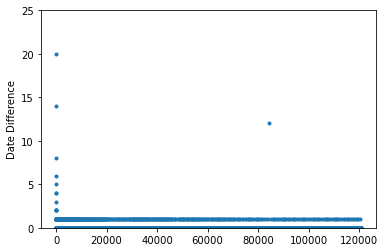

In [39]:
plt.plot([t.days for t in dfLocal.sort_values(by='Start Date')['Start Date'].diff()], ".")
plt.ylim([0, 25])

plt.ylabel("Date Difference")

Text(0, 0.5, 'Date Difference')

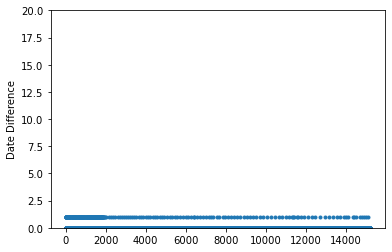

In [40]:
plt.plot([t.days for t in dfGoods.sort_values(by='Start Date')['Start Date'].diff()[0:]], ".")
plt.ylim([0, 20])

plt.ylabel("Date Difference")

Text(0, 0.5, 'Date Difference')

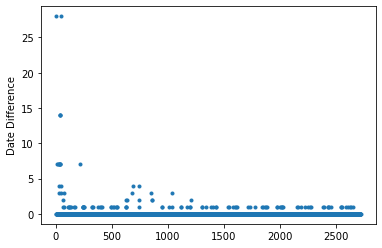

In [41]:
plt.plot([t.days for t in dfTravel.sort_values(by='Start Date')['Start Date'].diff()[0:]], ".")

plt.ylabel("Date Difference")

### Plotting trends

In [42]:
dfsC = {}  # new dict of dataframes grouped by day + count
for key, d in dfs.items():
    dfLoop = d.groupby('Start Date').sum()  # sum per day
    dfLoop['dealcount'] = d.groupby('Start Date')['Deal ID'].count()  # add daily count
    idx = pd.date_range(min(d['Start Date']), max(d['Start Date']))  # date range with all days
    dfsC[key] = dfLoop.reindex(idx, fill_value=0.)  # reindex to have all days, including those without deals
    dfsC[key]['added'] = np.zeros(len(dfsC[key])).astype('bool')  # add a column for whether is real data or added 

(15949.0, 16070.0)

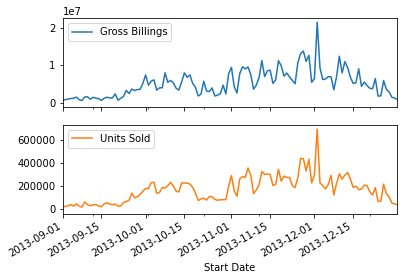

In [43]:
# Plot the zoomed version from early September towards the end of December
df.groupby(by=['Start Date']).sum().plot(None, ['Gross Billings', 'Units Sold'], subplots=True, sharex=True)

plt.xlim(['2013-09-01', '2013-12-31'])

From plotting the start date by gross billings & units sold, I can see that indeed there are an upward trend from period of September to October, peak increment by December 1st, and downward trend from peak towards the end of December. 

In [44]:
# Reindex and group deals by day, according to the full date range for each segments
dfsR = {}
for key, d in dfs.items():
    dfLoop = d.groupby('Start Date').sum()
    idx = pd.date_range(min(d['Start Date']), max(d['Start Date']))
    dfsR[key] = dfLoop.reindex(idx, fill_value=0.)

In [45]:
dfTmp = dfsC['Local'].copy()  #Shortcut for Local segment dataset

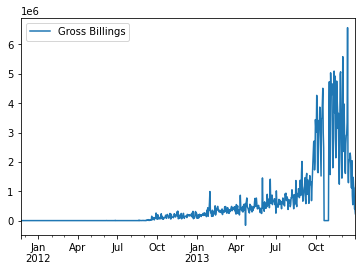

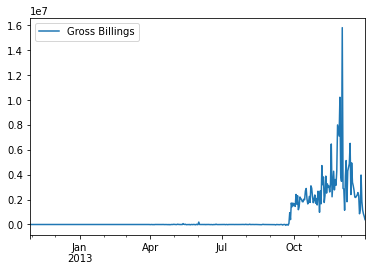

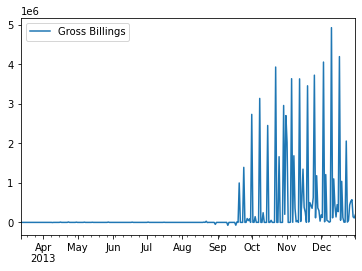

In [46]:
for d in dfsR.values():
    d.plot(None, 'Gross Billings')

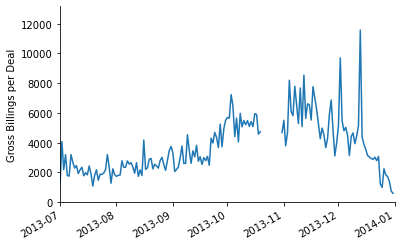

In [47]:
plt.figure(figsize=[6, 4])
plt.plot(dfsC['Local']['Gross Billings'] / dfsC['Local']['dealcount'], marker="")
dfTmp.plot(None, ['dealcount'], alpha=0., ax=plt.gca(), legend=[])
plt.xlim(['2013-07-01', '2014-01-01'])
plt.gca().get_xlim()
plt.ylabel("Gross Billings per Deal")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylim([0., ax.get_ylim()[1]])

plt.savefig("./grossbilling_perdeal_vs_date.png", dpi=300, bbox_inches="tight")

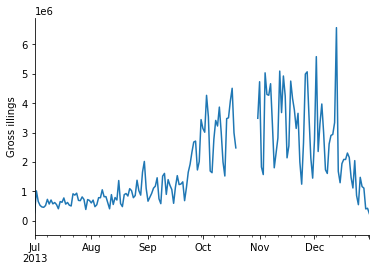

In [48]:
plt.figure(figsize=[6.,4])
ax = plt.subplot(111)
dfTmp.loc[:'2013-10-19'].plot(None, 'Gross Billings', ax=ax, marker="", c=colors[0], legend=[])
dfTmp.loc['2013-10-31':].plot(None, 'Gross Billings', ax=ax, marker="", c=ax.lines[-1].get_color(), legend=[])
plt.xlim(['2013-07-01', '2013-12-31'])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Gross illings")
plt.savefig("./gross_billings_vs_date_simple.png", dpi=300)

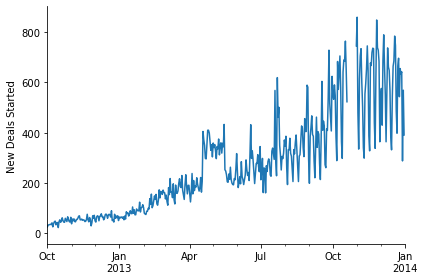

In [49]:
plt.figure(figsize=[6,4])
ax = plt.subplot(111)
dfTmp.loc[:'2013-10-19'].plot(None, 'dealcount', ax=ax, label="", legend=[])
dfTmp.loc['2013-10-31':].plot(None, 'dealcount', ax=ax, label="", legend=[], c=ax.lines[0].get_color())

plt.xlim(['2012-10-01', '2014-01-01'])

plt.ylabel('New Deals Started')
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("./newdeals_vs_date.png", dpi=300)

# Data adjustments for the Local segment outage

### Method 1) Use the mean value in days around to estimate the missing gross billings data

In [50]:
tmpG = pd.concat([dfsC['Local'].loc['2013-09-30':'2013-10-19', 'Gross Billings'], 
                 dfsC['Local'].loc['2013-10-31':'2013-11-19', 'Gross Billings']])

missed_dailygross = tmpG.sum() / tmpG.shape[0]
missed_dailygross * 11, missed_dailygross

(36619769.3252875, 3329069.9386625)

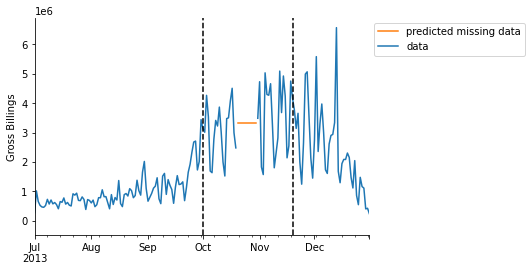

In [51]:
fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot(111)

dfsC['Local'].loc[:'2013-10-19'].plot(None, 'Gross Billings', ax=ax, legend=[])
plt.plot(dfsC['Local'].loc['2013-10-20':'2013-10-30'].index, missed_dailygross * np.ones(11), ls="-")
dfsC['Local'].loc['2013-10-31':].plot(None, 'Gross Billings', ax=ax, legend=[], c=ax.lines[0].get_color())
plt.axvline(['2013-10-01'], c="k", ls="--")
plt.axvline(['2013-11-19'], c="k", ls="--")
plt.ylabel("Gross Billings")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlim(['2013-07-01', '2013-12-31'])
plt.legend([ax.lines[1], ax.lines[0]], ["predicted missing data", "data"], loc="upper left", bbox_to_anchor=[1., 1.])

plt.savefig("./gross_billings_vs_date.png", dpi=300, bbox_inches="tight")

In [52]:
# Do the same estimation for the missed number of deal started and units sold
tmpM = pd.concat([dfsC['Local'].loc['2013-09-30':'2013-10-19', 'dealcount'], 
                 dfsC['Local'].loc['2013-10-31':'2013-11-19', 'dealcount']])

missed_dailymean = tmpM.sum() / tmpM.shape[0]
missed_dailymean

569.425

In [53]:
tmpS = pd.concat([dfsC['Local'].loc['2013-09-30':'2013-10-19', 'Units Sold'], 
                 dfsC['Local'].loc['2013-10-31':'2013-11-19', 'Units Sold']])

missed_dailysold = tmpS.sum() / tmpS.shape[0]
missed_dailysold * 11

1389043.7

In [54]:
# Create new dataset for missing dates, to fill with artificial data

values2fill_mean = pd.DataFrame(index=pd.date_range('2013-10-20', '2013-10-30'), columns=['Gross Billings', 'Units Sold', 'dealcount'])  
values2fill_mean.loc[:, 'Gross Billings'] = missed_dailygross
values2fill_mean.loc[:, 'Units Sold'] = missed_dailysold
values2fill_mean.loc[:, 'dealcount'] = missed_dailymean
values2fill_mean

,Gross Billings,Units Sold,dealcount
2013-10-20,3.329070e+06,126276.7,569.425
2013-10-21,3.329070e+06,126276.7,569.425
2013-10-22,3.329070e+06,126276.7,569.425
2013-10-23,3.329070e+06,126276.7,569.425
2013-10-24,3.329070e+06,126276.7,569.425
2013-10-25,3.329070e+06,126276.7,569.425
2013-10-26,3.329070e+06,126276.7,569.425
2013-10-27,3.329070e+06,126276.7,569.425
2013-10-28,3.329070e+06,126276.7,569.425
2013-10-29,3.329070e+06,126276.7,569.425


In [55]:
values2fill_mean.sum()

Gross Billings    3.661977e+07
Units Sold        1.389044e+06
dealcount         6.263675e+03
dtype: float64

Using the mean calculation, I estimated that there are missing gross bilings from Q4 2013 due to the outage, and the missing value is a total of $36,619,769.

### Method 2) Keep into account day-by-day variability and up and down pattern

In [56]:
import statsmodels.api as sm
from sklearn import linear_model
import datetime as dt

(15978.0, 16028.0)

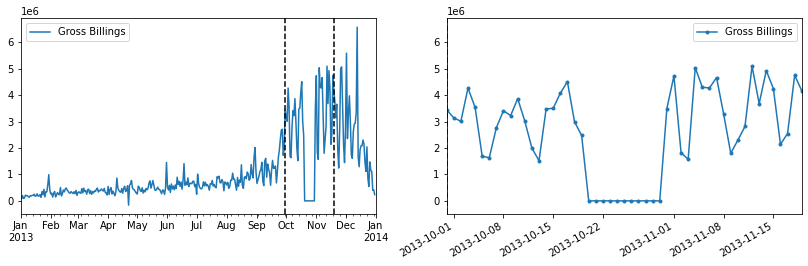

In [57]:
limits = ['2013-09-30', '2013-11-19'] # Use the same date limit as for mean calculation
missingperiod = ['2013-10-20', '2013-10-30']  

plt.figure(figsize=[14, 4])
ax = plt.subplot(121)
dfTmp.plot(None, 'Gross Billings', ax=ax)
plt.axvline(limits[0], c="k", ls="--")
plt.axvline(limits[1], c="k", ls="--")
plt.xlim(['2013-01-01', '2014-01-01'])

ax = plt.subplot(122)
ax.axvline(pd.date_range('2013-09-30', '2013-09-30', freq="D"), c="k", ls="--")
dfTmp.plot(None, 'Gross Billings', ax=ax, marker=".")
plt.xlim(limits[0], limits[1])

Is there a pattern based on days of the week, beyond the general trend?
To test this, I'll try model comparison: on one side, I'll consider a model with only the general trend. On the other side, I'll add predictors based on the day of the week.

In [58]:
dataY = pd.concat([dfTmp.loc[limits[0]:'2013-10-19', :], dfTmp.loc['2013-10-31':limits[1], :]])

dayvar = dataY.index.map(dt.datetime.toordinal).to_numpy().astype("float")
dayvar_norm = (dayvar - dayvar[0]) / (dayvar[-1] - dayvar[0])  # normalize to be between 0 and 1

dummy_weekday = pd.get_dummies([t.dayofweek for t in dataY.index])
dataX = np.concatenate((dummy_weekday.to_numpy().astype("float"), dayvar_norm[:, None]), axis=1)
dataXtrend = dayvar_norm[:, None]

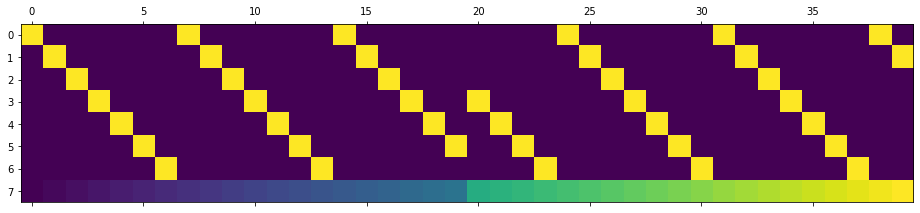

In [59]:
plt.matshow(dataX.T)

In [60]:
dayvar.shape, dummy_weekday.shape, dataY.shape, dataX.shape

((40,), (40, 7), (40, 5), (40, 8))

In [61]:
from sklearn.model_selection import cross_validate 

In [62]:
mod = linear_model.LinearRegression()
mod.fit(dataX, dataY['Gross Billings'].to_numpy())

mod_trend = linear_model.LinearRegression()
mod_trend.fit(dataXtrend, dataY['Gross Billings'].to_numpy())

LinearRegression()

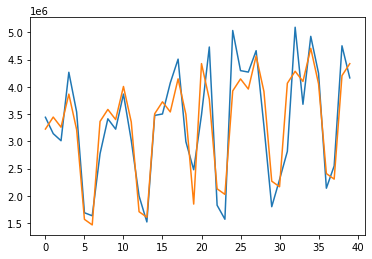

In [63]:
plt.plot(dataY['Gross Billings'].to_numpy(), label="data")
plt.plot(mod.predict(dataX), label="multivariate reg.")

In [64]:
# now use the model to predict
testdays = pd.date_range(missingperiod[0], missingperiod[-1])
dayvar_test = testdays.map(dt.datetime.toordinal).to_numpy().astype("float")
dayvar_test = (dayvar_test - dayvar[0]) / (dayvar[-1] - dayvar[0])  # normalize to be between 0 and 1
dummy_weekday_test = pd.get_dummies([t.dayofweek for t in testdays])
dataXtest = np.concatenate((dummy_weekday_test.to_numpy().astype("float"), dayvar_test[:, None]), axis=1)

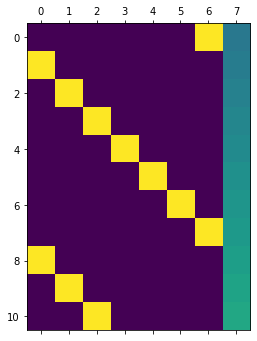

In [65]:
plt.matshow(dataXtest)

In [66]:
Ypred = mod.predict(dataXtest)
Ypred_trend = mod_trend.predict(dayvar_test[:, None])

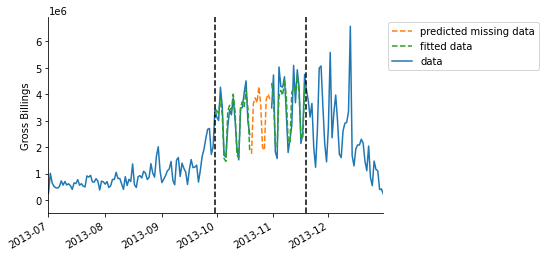

In [67]:
plt.figure(figsize=[6,4])
ax = plt.subplot(111)

plt.plot(dfTmp.loc[missingperiod[0]:missingperiod[1]].index, Ypred, marker="", c=colors[1], ls="--", zorder=5)
plt.plot(dfTmp.loc[limits[0]:'2013-10-19'].index, mod.predict(dataX[:20, :]), marker="", c=colors[2], ls="--", zorder=5)
plt.plot(dfTmp.loc['2013-10-31':limits[1]].index, mod.predict(dataX[20:, :]), marker="", c=colors[2], ls="--", zorder=5)
dfTmp.loc[:'2013-10-19'].plot(None, 'Gross Billings', ax=ax, marker="", c=colors[0], legend=[])
dfTmp.loc['2013-10-31':].plot(None, 'Gross Billings', ax=ax, marker="", c=ax.lines[-1].get_color(), legend=[])
plt.axvline(['2013-09-30'], c="k", ls="--")
plt.axvline(['2013-11-19'], c="k", ls="--")
plt.xlim(['2013-07-01', '2013-12-31'])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.legend([ax.lines[0], ax.lines[1], ax.lines[3]], ['predicted missing data', 'fitted data', 'data'], loc="upper left", bbox_to_anchor=[1., 1])
ax.set_ylabel("Gross Billings")

plt.savefig("./gross_billings_vs_date_filled_multi.png", dpi=300, bbox_inches="tight")

In [68]:
Ypred

array([1744669.91619918, 3644884.92012466, 3864883.01245799,
       3679166.70785014, 4286260.03908333, 3633878.38983333,
       1987168.60766667, 1884775.78994986, 3784990.79387534,
       4004988.88620867, 3819272.58160082])

In [69]:
np.sum(Ypred), np.sum(Ypred_trend), Ypred.shape, missed_dailygross * 11

(36334939.64485, 36619769.3252875, (11,), 36619769.3252875)

In [70]:
values2fill_multi = pd.DataFrame(Ypred, index= pd.date_range(missingperiod[0], missingperiod[1], freq="D"), columns=['Gross Billings'])
values2fill_multi

,Gross Billings
2013-10-20,1.744670e+06
2013-10-21,3.644885e+06
2013-10-22,3.864883e+06
2013-10-23,3.679167e+06
2013-10-24,4.286260e+06
2013-10-25,3.633878e+06
2013-10-26,1.987169e+06
2013-10-27,1.884776e+06
2013-10-28,3.784991e+06
2013-10-29,4.004989e+06


In [71]:
values2fill_multi.sum()

Gross Billings    3.633494e+07
dtype: float64

Using the multivariate regression method, I estimated that there are missing gross bilings from Q4 2013 due to the outage, and the missing value is a total of $36,334,940

In [72]:
# compute the error on this estimate #
Rsq = mod.score(dataX, dataY['Gross Billings'].to_numpy())
Rsq

0.7886177099345996

The model explains roughly 79% of the variance of the training data.

In [73]:
residual_std = np.sqrt((1 - Rsq) * np.var(dataY['Gross Billings'].to_numpy()))  # residual standard deviation
residual_std, residual_std / values2fill_multi.sum()

(483131.6353112457,
 Gross Billings    0.013297
 dtype: float64)

The unexplained variance results in an unexplained standard deviation of $483,131, roughly 1.3% of my estimate. I will have to add this number to the error estimated for the Local segment to obtain a more conservative estimate of the uncertainty.

### Fill in the missing values using either the two methods proposed

In [74]:
# fill in missing values
method = "multi"  # "mean" or "multi" ; Interchangeable to compare the data differences obtained through both methods.
missingperiod = ['2013-10-20', '2013-10-30']
if method == "mean":
    dfsC['Local'].loc[missingperiod[0]:missingperiod[1], ['Gross Billings', 'Units Sold', 'dealcount']] = values2fill_mean.loc[:, ['Gross Billings', 'Units Sold', 'dealcount']]
elif method == "multi":
    dfsC['Local'].loc[missingperiod[0]:missingperiod[1], ['Gross Billings']] = values2fill_multi.loc[:, ['Gross Billings']]
dfsC['Local'].loc[missingperiod[0]:missingperiod[1], 'added'] = True

In [75]:
dfsC['Local'][dfsC['Local']['added'] == True]

,Units Sold,Gross Billings,anomaly,dealcount,added
2013-10-20,0.0,1.744670e+06,0.0,0.0,True
2013-10-21,0.0,3.644885e+06,0.0,0.0,True
2013-10-22,0.0,3.864883e+06,0.0,0.0,True
2013-10-23,0.0,3.679167e+06,0.0,0.0,True
2013-10-24,0.0,4.286260e+06,0.0,0.0,True
2013-10-25,0.0,3.633878e+06,0.0,0.0,True
2013-10-26,0.0,1.987169e+06,0.0,0.0,True
2013-10-27,0.0,1.884776e+06,0.0,0.0,True
2013-10-28,0.0,3.784991e+06,0.0,0.0,True
2013-10-29,0.0,4.004989e+06,0.0,0.0,True


# Calculate Groupon North America Gross Billing for Q4 2013 

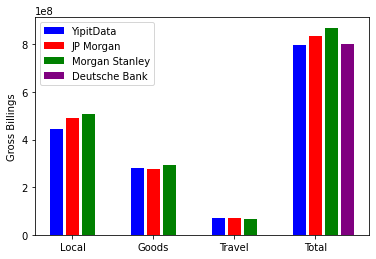

In [76]:
# Plot the prediction against the consensus data from banks.

ticks= np.arange(1, 5*4, 5)

for i, d in enumerate(dfsC.values()):
    plt.bar(ticks[i], d.sum()['Gross Billings'], color='blue') 
plt.bar(ticks[-1], sum([d.sum()['Gross Billings'] for d in dfsC.values()]), color='blue', label='YipitData')
plt.bar(ticks + 1, dfB[dfB.bank=='jpm']['Gross Billings'], label='JP Morgan', color='red')
plt.bar(ticks + 2, dfB[dfB.bank=='ms']['Gross Billings'], label='Morgan Stanley', color='green')
plt.bar(ticks[-1] + 3, dfB[dfB.bank=='db']['Gross Billings'], label='Deutsche Bank', color='purple')

ax = plt.gca()
ax.xaxis.set_ticks(ticks + 1)
ax.xaxis.set_ticklabels(['Local', 'Goods', 'Travel', 'Total'])
ax.set_ylabel('Gross Billings')

plt.legend()

### Output the sum of gross billings per segment for the Q4 2013

In [77]:
dfsC["Local"].sum()['Gross Billings']

445557597.62685007

In [78]:
dfsC["Goods"].sum()['Gross Billings']

282245671.04132

In [79]:
dfsC["Travel"].sum()['Gross Billings']

70552062.1245

In [80]:
dfsC["Local"].sum()['Gross Billings'] + dfsC["Goods"].sum()['Gross Billings'] + dfsC["Travel"].sum()['Gross Billings']

798355330.7926701